Loan Annual Percentage Rate and Estimated Return 
============

This project is part of the Udacity Data Analyst Nano Degree Program and serves as practice for data visualization. This document explores a dataset containing information about <a href='https://www.prosper.com/'>Prosper's</a> loan data. Prosper is America’s first marketplace lending platform, with over $9 billion in funded loans.
This dataset contains 113,937 loans with 81 variables on each loan. 


Investigation Overview
============
We're specifically interested in learning about the types of loans that yield the highest returns, and knowing what are the features that correlate with the lowest Annual Percentage Rate (APR). We'll be looking at the relationships among multiple variables using summary statistics and data visualizations. 


## Preliminary Wrangling and Cleaning


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

# Simplify the dataframe to only include relevant columns for this analysis
# Save df into a new variable to keep the original df untouched
df2 = df[['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'ListingCategory (numeric)', 'EstimatedReturn', 'LenderYield', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'IncomeRange', 'MonthlyLoanPayment']]

# high-level overview of data shape and composition
print(df2.shape)
print(df2.info())

(113937, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                    113937 non-null object
ListingCreationDate           113937 non-null object
Term                          113937 non-null int64
LoanStatus                    113937 non-null object
BorrowerAPR                   113912 non-null float64
ListingCategory (numeric)     113937 non-null int64
EstimatedReturn               84853 non-null float64
LenderYield                   113937 non-null float64
EmploymentStatus              111682 non-null object
IsBorrowerHomeowner           113937 non-null bool
CreditScoreRangeLower         113346 non-null float64
LoanMonthsSinceOrigination    113937 non-null int64
LoanOriginalAmount            113937 non-null int64
IncomeRange                   113937 non-null object
MonthlyLoanPayment            113937 non-null float64
dtypes: bool(1), float64(5), int64(4), object(5)
memory usage: 12.3+ MB
None


We are dealing with 113,937 rows and 15 features.  

In [4]:
# Visual assessment
df2.sample(10)

ListingKey            ListingCreationDate  Term  \
22024   EAF23402804763307C6FCC8  2007-10-09 15:53:24.870000000    36   
20913   BA7835941692823033A45B5  2013-11-14 08:13:57.963000000    36   
72250   575036011251278922F885F  2014-01-18 03:57:17.763000000    36   
23483   B75135520932204431E1F68  2012-07-20 08:15:03.603000000    36   
19818   8D1A35923750329247AC758  2013-10-24 19:22:12.770000000    36   
107342  F19734793099525871F7760  2010-03-24 09:50:39.863000000    36   
54174   1F34353137237978451838F  2011-11-22 08:40:48.293000000    36   
79661   A1173581697902361290AC9  2013-06-12 18:04:15.347000000    60   
70274   7CE7343204695481401B40E  2008-09-17 03:35:54.263000000    36   
27323   C0F83415977161995FC7BD1  2008-03-24 06:26:50.170000000    36   

        LoanStatus  BorrowerAPR  ListingCategory (numeric)  EstimatedReturn  \
22024    Completed      0.23246                          0              NaN   
20913      Current      0.24205                          1          0.08980   
72250      Current      0.19501                          1          0.07713   
23483      Current      0.31012                          3          0.12160   
19818      Current      0.22875                          1          0.08872   
107342   Completed      0.11296                          2          0.06080   
54174    Completed      0.29486                          1          0.12800   
79661      Current      0.24282                          7          0.11330   
70274   Chargedoff      0.17193                          3              NaN   
27323    Completed      0.12562                          4              NaN   

        LenderYield EmploymentStatus  IsBorrowerHomeowner  \
22024        0.2150        Full-time                False   
20913        0.1945         Employed                False   
72250        0.1485         Employed                 True   
23483        0.2610         Employed                False   
19818        0.1815         Employed                False   
107342       0.0820        Full-time                False   
54174        0.2461         Employed                 True   
79661        0.2079            Other                False   
70274        0.1475        Full-time                False   
27323        0.0945        Full-time                False   

        CreditScoreRangeLower  LoanMonthsSinceOrigination  LoanOriginalAmount  \
22024                   680.0                          77                6000   
20913                   640.0                           4                4600   
72250                   680.0                           2                4000   
23483                   620.0                          20               10000   
19818                   680.0                           4               10000   
107342                  720.0                          47                3000   
54174                   660.0                          28                2000   
79661                   740.0                           9                2000   
70274                   700.0                          66                1500   
27323                   640.0                          71                7499   

           IncomeRange  MonthlyLoanPayment  
22024        $1-24,999              230.70  
20913   $50,000-74,999              172.01  
72250   $25,000-49,999              140.33  
23483   $25,000-49,999              408.79  
19818   $25,000-49,999              367.32  
107342       $1-24,999               95.68  
54174   $25,000-49,999               80.17  
79661   $50,000-74,999               55.00  
70274   $25,000-49,999               52.55  
27323   $25,000-49,999              183.47

In [6]:
# drop null credit score and Employment Status null values 
df2 = df2.dropna(subset = ['CreditScoreRangeLower', 'EmploymentStatus'], how = 'any' )

In [8]:
# convert Credit Score into ordered categorical values

# Bin edges 
bin_edges = [-1, 1, 579, 669, 739, 799, 900] 

# Labels for our credit scores
bin_names = ['Not Available', 'Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

# Create CreditScore column
df2['CreditScore'] = pd.cut(df2['CreditScoreRangeLower'], bin_edges, labels=bin_names)

# Let's take a randon sample to see if our categories work
df2.sample(5)

ListingKey            ListingCreationDate  Term  \
81759   57DE34193009114294DE494  2008-04-13 22:36:41.577000000    36   
68179   B798360305447604008EE01  2014-02-27 06:05:15.513000000    60   
110355  27C3357539339489622F8EE  2013-04-01 17:40:40.957000000    60   
81273   78C73408864532616376F43  2008-01-03 07:35:09.523000000    36   
67475   D01135853292661557FCE28  2013-07-21 15:20:58.783000000    36   

       LoanStatus  BorrowerAPR  ListingCategory (numeric)  EstimatedReturn  \
81759   Completed      0.36623                          3              NaN   
68179     Current      0.17198                          1          0.07045   
110355    Current      0.22283                          1          0.10910   
81273   Completed      0.14207                          5              NaN   
67475     Current      0.20462                          1          0.08880   

        LenderYield EmploymentStatus  IsBorrowerHomeowner  \
81759        0.3400    Self-employed                 True   
68179        0.1385         Employed                 True   
110355       0.1884         Employed                False   
81273        0.1250        Part-time                False   
67475        0.1579         Employed                False   

        CreditScoreRangeLower  LoanMonthsSinceOrigination  LoanOriginalAmount  \
81759                   700.0                          71               25000   
68179                   680.0                           1               15000   
110355                  720.0                          10               10000   
81273                   660.0                          74                2500   
67475                   720.0                           8                2000   

           IncomeRange  MonthlyLoanPayment CreditScore  
81759               $0             1130.90        Good  
68179        $100,000+              355.67        Good  
110355  $25,000-49,999              264.05        Good  
81273   $25,000-49,999               84.84        Fair  
67475   $25,000-49,999               71.10        Good

Listing Categories are currently numeric. Let's convert these values into their names to make them more explicite. 

In [9]:
df2['ListingCategory (numeric)'] = df2['ListingCategory (numeric)'].replace({
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'})


In [10]:
# Rename the column
df2['ListingCategory'] = df2['ListingCategory (numeric)']

Some categories in the dataset are ordinal, however, they are currently of type object. Let's convert these to categorical type.  

In [11]:
# convert Term, IncomeRange, CreditScoreRangeLower, into ordered categorical types
ordinal_var_dict = {
                    'Term':        [12, 36, 60],
                    'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                    '$75,000-99,999', '$100,000+'],
                    'CreditScore': ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'],
                    'LoanStatus':  ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Chargedoff', 'Cancelled',
                                    'Past Due (1-15 days)',  'Past Due (16-30 days)',  'Past Due (31-60 days)', 
                                    'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df2[var] = df2[var].astype(ordered_var)

Test to see if they converted correctly. 

## Distribution of Borrower APR
Borrower APR is slightly skewed to the left and range from 0.006 to 0.42. We can see some peaks throughout the whole distribution, the most obvious one being at 0.35. This seems to show that there are certain preconstructed borrower annual percentage rates, the most common one being 0.35.

Text(0, 0.5, 'Count')

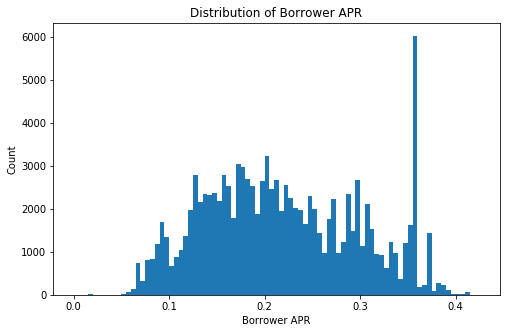

In [13]:
binsize = 0.005
bins = np.arange(0, df2.BorrowerAPR.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'BorrowerAPR', bins = bins);
plt.title('Distribution of Borrower APR')
plt.xlabel('Borrower APR')
plt.ylabel('Count')

## Estimated Return
Estimated Returns more or less follows a normal distribution. Return rates range from -0.18 to 0.28. Anything over 0.15 is very rare. The average return for a loan is 0.96. 

(0, 0.25)

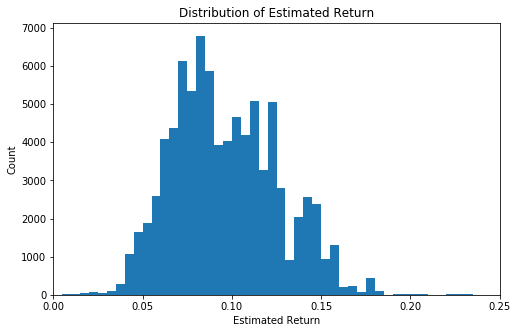

In [15]:
binsize = 0.005
bins = np.arange(0, df2.EstimatedReturn.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'EstimatedReturn', bins = bins);
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title('Distribution of Estimated Return')
plt.xlim(0, 0.25)

#### Loan Months Since Origination 

Text(0.5, 0, 'Loan Months Since Origination')

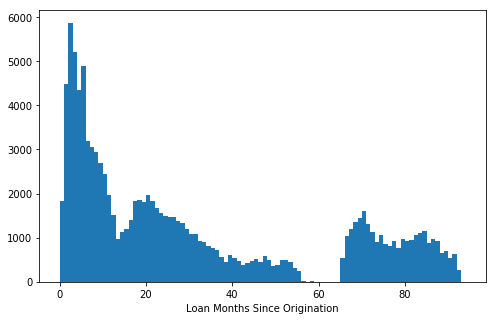

In [17]:
binsize = 1
bins = np.arange(0, df2.LoanMonthsSinceOrigination.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'LoanMonthsSinceOrigination', bins = bins);
plt.xlabel('Loan Months Since Origination')

## Loan Original Amount
There's a long tail in the distribution, so we made this graph on a log scale. Loans can range from 1000\\$ (the minimum amount in the dataset) to 35,000\\$. The graph indicates that some loan amounts are much more popular than others. 

Text(0.5, 0, 'Loan Original Amount')

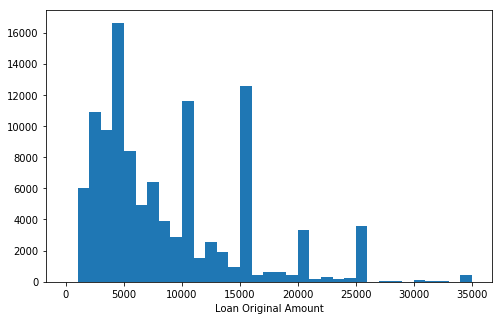

In [18]:
binsize = 1000
bins = np.arange(0, df2.LoanOriginalAmount.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Original Amount')

(600, 50000)

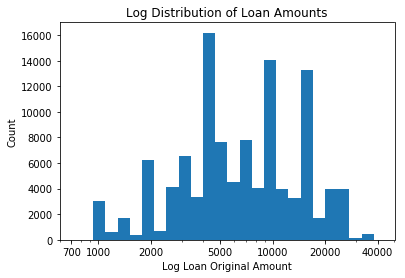

In [19]:
log_binsize = 0.07
bins = 10 ** np.arange(1.5, np.log(df2.LoanOriginalAmount.max())+log_binsize, log_binsize)
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

plt.hist(data = df2, x= 'LoanOriginalAmount', bins = bins);

plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Log Loan Original Amount')
plt.ylabel('Count')
plt.title('Log Distribution of Loan Amounts')
plt.xlim(600, 50000)

## Monthly Loan Payment
We also used log scale for this graph. This allows us to better understand the distribution of loans between 100 and 500\\$. A commmon loan payment is around 175\\$ / month. The median monthly payment is \\$217, less than the mean of \\$272, so the distribution skews toward smaller monthly payments. No payment is more than \\$2,252, but that appears to be a signficant outlier. There are very few payments above \\$1,000.

Text(0.5, 0, 'Monthly Loan Payment')

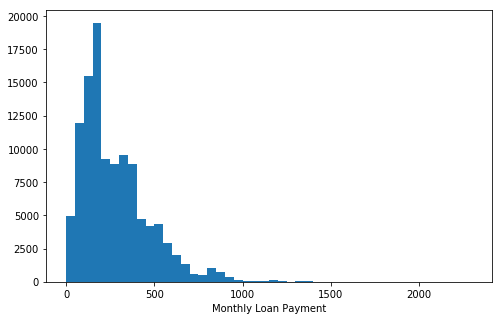

In [21]:
binsize = 50
bins = np.arange(0, df2.MonthlyLoanPayment.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'MonthlyLoanPayment', bins = bins);
plt.xlabel('Monthly Loan Payment')


Let's use a log scale for Monthly Loan Payment as well.

(20, 2500)

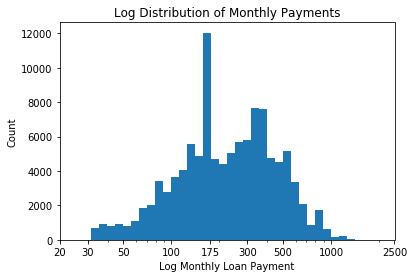

In [22]:
log_binsize = 0.05
bins = 10 ** np.arange(1.5, np.log(df2.MonthlyLoanPayment.max())+log_binsize, log_binsize)
ticks = [20, 30, 50, 100, 175, 300, 500, 1000, 2500]

plt.hist(data = df2, x= 'MonthlyLoanPayment', bins = bins);

plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Log Monthly Loan Payment')
plt.ylabel('Count')
plt.title('Log Distribution of Monthly Payments')
plt.xlim(20, 2500)

### Ordinal Variables 

## Term, Income Range and Credit Score
Most loans are 36 month terms in this dataset. Borrowers' income are mostly below 75,000\\$ per year. 

Overall, it appears that a large majority of loans are either Completed or Current, though there are also a large number of Charged-off and Defaulted (non-performing). A little later I will want to look at loan performance based on origination vintage.

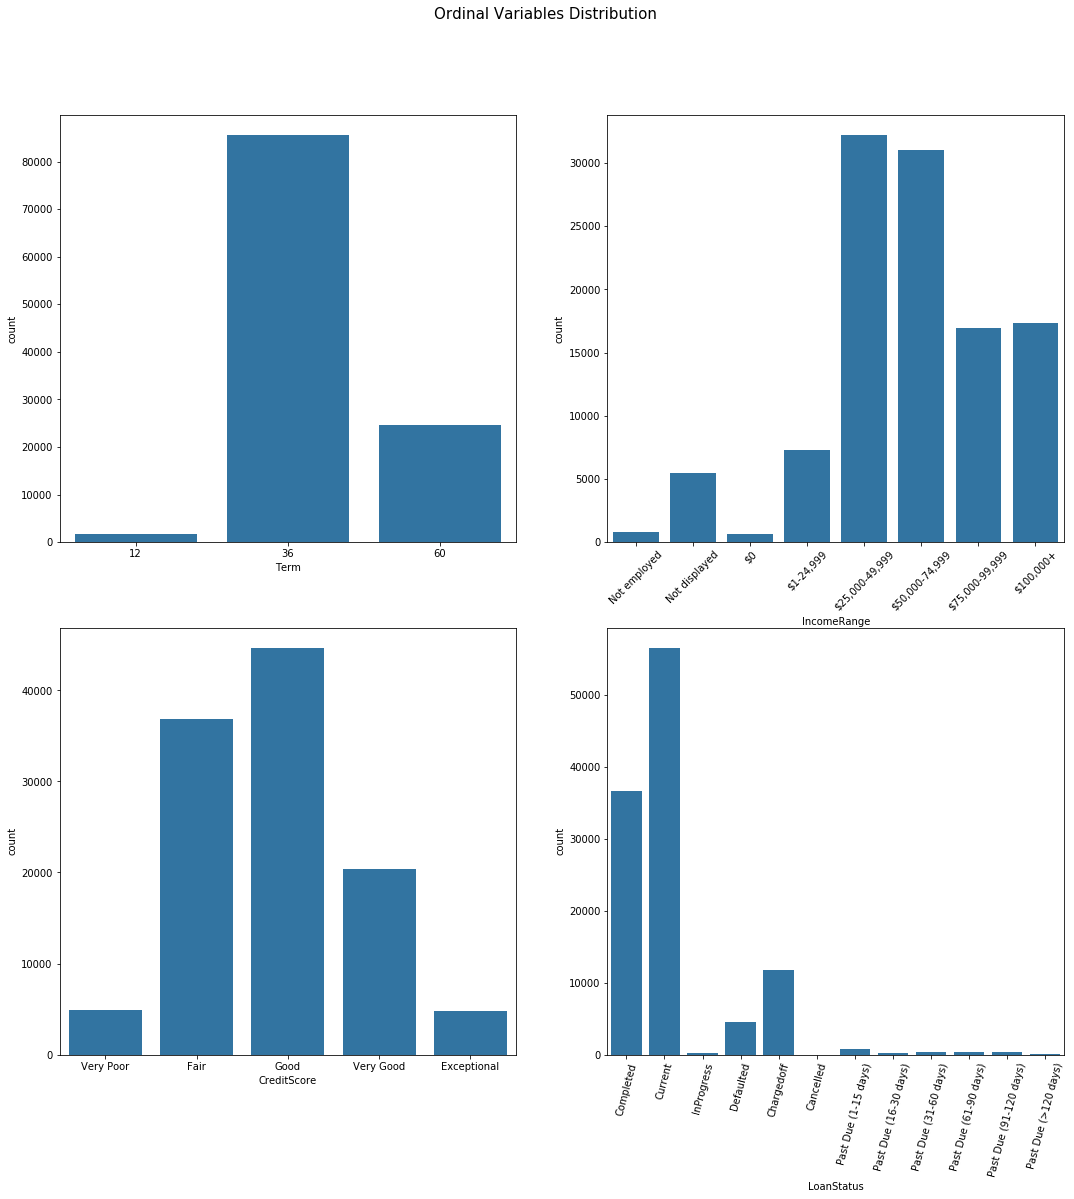

In [23]:
# let's plot all four ordinary variables together to get an idea of each distribution.

IncomeRange_labels = ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                    '$75,000-99,999', '$100,000+']
LoanStatus_labels = ['Completed', 'Current', 'InProgress', 'Defaulted', 'Chargedoff', 'Cancelled',
                                    'Past Due (1-15 days)',  'Past Due (16-30 days)',  'Past Due (31-60 days)', 
                                    'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']


fig, ax = plt.subplots(nrows=2 , ncols = 2, figsize = [18,15])

default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'Term', color = default_color, ax = ax[0, 0])
sb.countplot(data = df2, x = 'IncomeRange', color = default_color, ax = ax[0, 1])
sb.countplot(data = df2, x = 'CreditScore', color = default_color, ax = ax[1, 0])
sb.countplot(data = df2, x = 'LoanStatus', color = default_color, ax = ax[1, 1])

ax[0,1].set_xticklabels(labels = IncomeRange_labels, rotation = 45)
ax[1,1].set_xticklabels(labels = LoanStatus_labels, rotation = 75)

plt.subplots_adjust(bottom = 0.01)
fig.suptitle("Ordinal Variables Distribution", fontsize=15)

plt.show()

## Listing Categories

The most common listing category is by far Debt Consolidation. Other popular ones inclure Home Improvement, Auto, Business, and Other. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

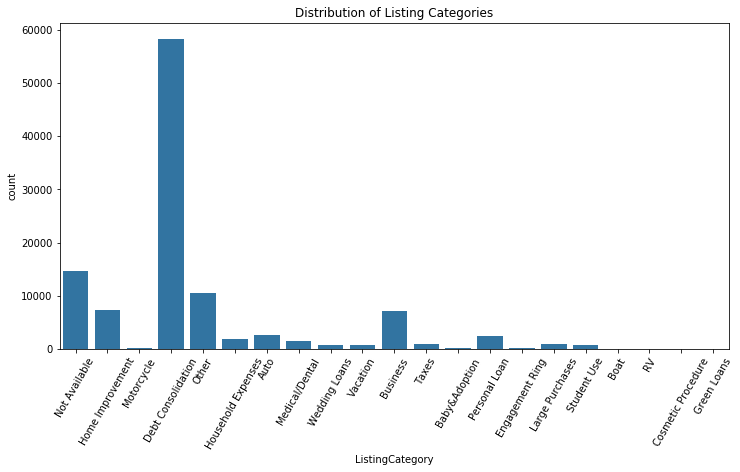

In [25]:
plt.figure(figsize = [12, 6])
default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'ListingCategory', color = default_color)
plt.title('Distribution of Listing Categories')
plt.xticks(rotation = 60)

## Estimated Return VS Loan Original Amount & Estimated Return VS Loan Months Since Origination

**Right**: We can see a slight negative correlation between the Estimated Return and the log of the Loan Amount. On average smaller loans tend to yield higher returns. However, there is also more variability in returns for the smaller the loan so this means that there is more risk associated with smaller loans. 

##### Insight 1: If you were to invest multiple times in different loans, you would yield more returns with smaller loans. For a safer, one time bet, a higher loan would be more appropriate. 

**Left**: The duration of the loan seems to have no impact on return. We can see from this graph however that longer loans are riskier since they have higher variability in return. 

##### Insight 2: Longer term loans are more risky because they have more variability. On average however, the length of the loan has no impact  of estimated returns. 

Text(0.5, 1.0, 'Estimated Return based on number of months of the loan')

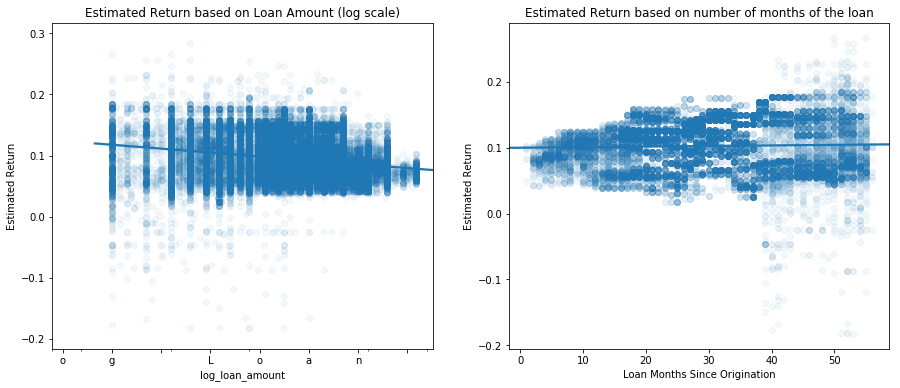

In [26]:
# log function to easily transform data to its log values
def log_trans(x, inverse = False):
    if not inverse:
        
        return np.log10(x)
    else:
        return np.power(10, x)

# Create a new column that has the log values of 'LoanOriginalAmount'
df2['log_loan_amount'] = df2['LoanOriginalAmount'].apply(log_trans)

# take only the completed loans
df2_completed = df2.query('LoanStatus == "Completed"')

# Create visualization
fig, ax = plt.subplots(ncols = 2, figsize = [15,6])
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

base_color = sb.color_palette()[0]

# First graph
sb.regplot(data = df2, x= 'log_loan_amount', y = 'EstimatedReturn', scatter_kws={'alpha':0.05}, ax = ax[0]);

ax[0].set_xticks(log_trans(np.array(ticks)), ticks)
ax[0].set_xticklabels('Log Loan Original Amount');
ax[0].set_ylabel('Estimated Return')
ax[0].set_title('Estimated Return based on Loan Amount (log scale)')

# Second graph
sb.regplot(data = df2_completed, x= 'LoanMonthsSinceOrigination', y = 'EstimatedReturn', scatter_kws={'alpha':0.05}, ax = ax[1], color = base_color);

ax[1].set_xlabel('Loan Months Since Origination');
ax[1].set_ylabel('Estimated Return')
ax[1].set_title('Estimated Return based on number of months of the loan')


## Estimated Returns VS Listing Category

There are 20 different listing categories, some of which are not represented much. For the next graph, we're only taking the listing categories where there are over 500 loans in the dataset. Otherwise we might get some incomplete information about the loan.   

Insight 3: Investing in a Home Improvement loan and a large purchase loan, is slightly less profitable than the others on average. 

In [67]:
THRESHOLD = 500
loan_frequency = df2['ListingCategory'].value_counts()
idx = np.sum(loan_frequency > THRESHOLD)

most_loans = loan_frequency.index[:idx]
df2_topcategories = df2.loc[df2['ListingCategory'].isin(most_loans)]

loan_mean = df2_topcategories.groupby('ListingCategory').mean()

# List our categories with over 500 loans of that type
df2_topcategories['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         14708
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Name: ListingCategory, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

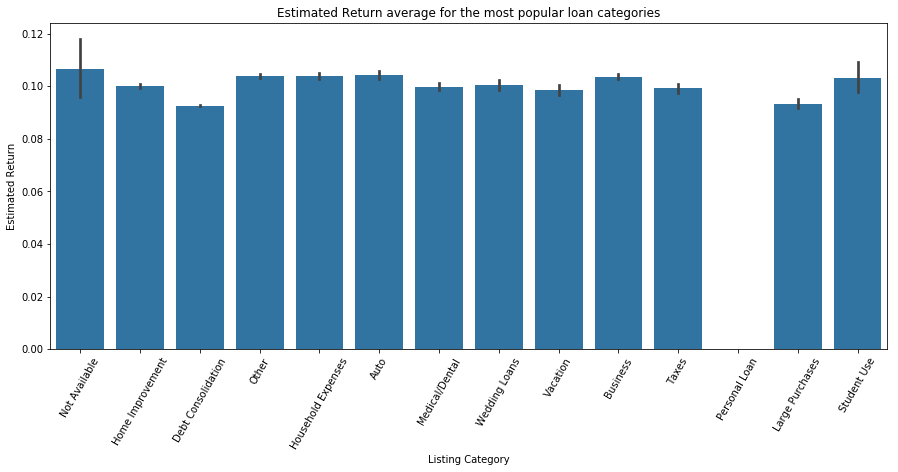

In [72]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [15, 6])
sb.barplot(data = df2_topcategories, x = 'ListingCategory', y = 'EstimatedReturn', color = base_color)
plt.title('Estimated Return average for the most popular loan categories')
plt.xlabel('Listing Category')
plt.ylabel('Estimated Return')
plt.xticks(rotation = 60)

## BorrowerAPR and Estimated Return VS Credit Score and Income Range
The average borrower APR becomes lower with better credit scores. Having an Exceptional credit score really makes a difference! The same thing can be said for income bracket, although the difference is less reveling. 

Loaning to borrowers that have lower incomes and lower credit scores yield slightly higher returns. 

Insight 4: Having an exceptional credit score makes a huge difference in the APR one can get. 

<Figure size 1296x720 with 0 Axes>

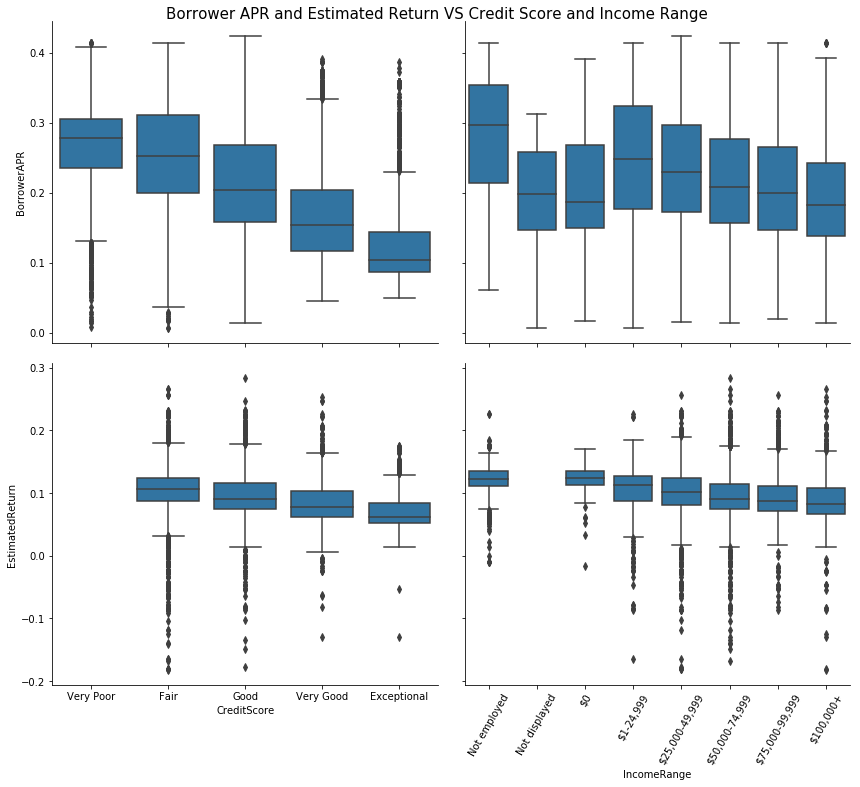

In [28]:
# Boxplot function
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

# Create visualization
plt.figure(figsize = [18, 10])
g = sb.PairGrid(data = df2, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['CreditScore', 'IncomeRange'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.suptitle('Borrower APR and Estimated Return VS Credit Score and Income Range', fontsize = 15, y = 1)
plt.xticks(rotation = 60);

## BorrowerAPR and Estimated Return VS Term

APR is the same for all loan durations. Returns on the other hand increase with loan duration. 

<Figure size 1296x1080 with 0 Axes>

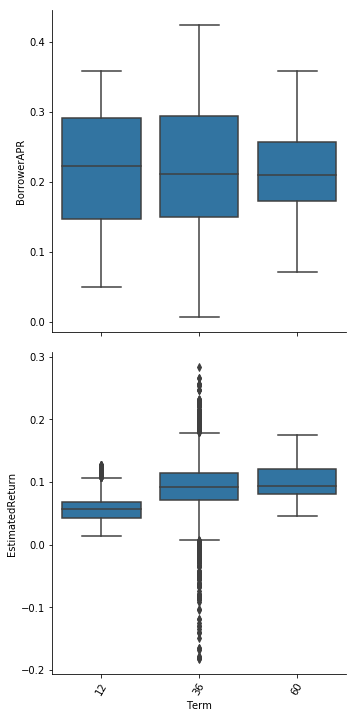

In [37]:
plt.figure(figsize = [18, 15])
g = sb.PairGrid(data = df2, x_vars = ['Term'], y_vars = ['BorrowerAPR', 'EstimatedReturn'],
                height = 5, aspect = 1)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

## Multivariable Exploration of Data

Are there features that strengthened each other in terms of looking at our features of interest?

We saw that the duration of the loan term seemed to have a high impact on returns. Let's have a look of how much difference it makes when comparing our different listing categories. 

### Estimated Return Analysis

#### Estimated Return VS Listing Category and Term

In [77]:
# Create Dataframes where employment status is full time and not employed to compare both
df2_topcategories_fulltime = df2_topcategories[df2_topcategories['EmploymentStatus'] == "Full-time"]
df2_topcategories_notemployed = df2_topcategories[df2_topcategories['EmploymentStatus'] == "Not employed"]

## Estimated Return VS Listing Category and Term

While there are ethical considerations at play, loans from unemployed people are yield more returns on average particularly in the home improvement, auto, and vacation category. That said, one listing category yields higher returns than any other category for fulltime employees: <b>vacation</b>

Insight 6: A 60 month term loan in the vacation cateogy for a fulltime employee is the best investment I found in this analysis.

Text(0.5, 0.98, 'Estimated Return based on listing category and term length')

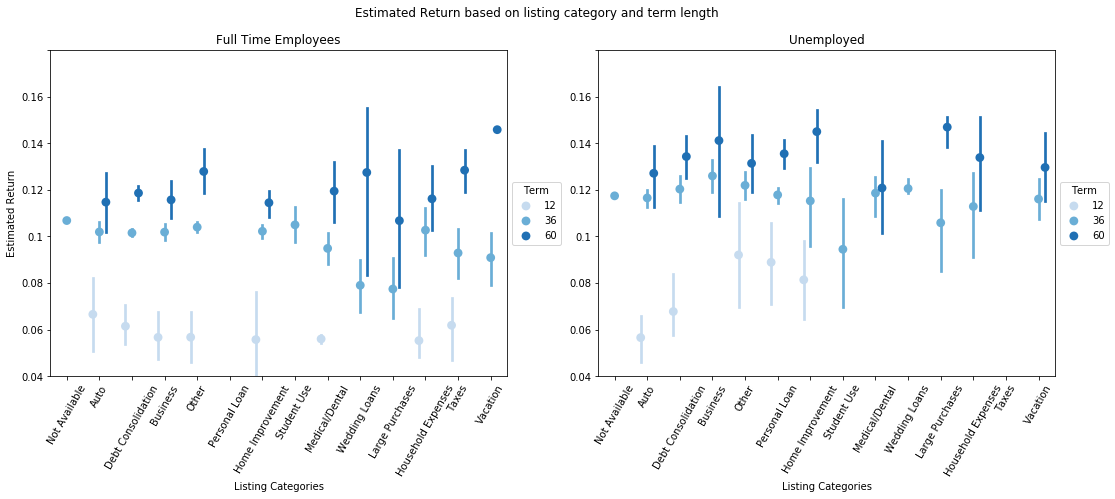

In [95]:
fig, ax = plt.subplots(ncols = 2, figsize = [18,6])

# plot figure 1
sb.pointplot(data = df2_topcategories_fulltime, x = 'ListingCategory', y = 'EstimatedReturn',  hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0])

ax[0].set_title('Full Time Employees')
ax[0].set_xlabel('Listing Categories')
ax[0].set_ylabel('Estimated Return')
ax[0].set_yticklabels([0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16])
ax[0].set_xticklabels(rotation = 60, labels = df2_topcategories_fulltime.ListingCategory.unique())
ax[0].set_ylim(0.04, 0.18)
# plot legend outside of figure
ax[0].legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))

# plot figure 2
sb.pointplot(data = df2_topcategories_notemployed, x = 'ListingCategory', y = 'EstimatedReturn',  hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1])

ax[1].set_title('Unemployed')
ax[1].set_xlabel('Listing Categories')
ax[1].set_ylabel(' ')
ax[1].set_yticklabels([0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16])
ax[1].set_xticklabels(rotation = 60, labels = df2_topcategories_fulltime.ListingCategory.unique())
ax[1].set_ylim(0.04, 0.18)
# plot legend outside of figure
ax[1].legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))
plt.suptitle('Estimated Return based on listing category and term length')

## Estimated Return VS Loan Amount and Term Length
Loans over 6000\\$ and that have a term of 60 months yield the highest returns on average. 

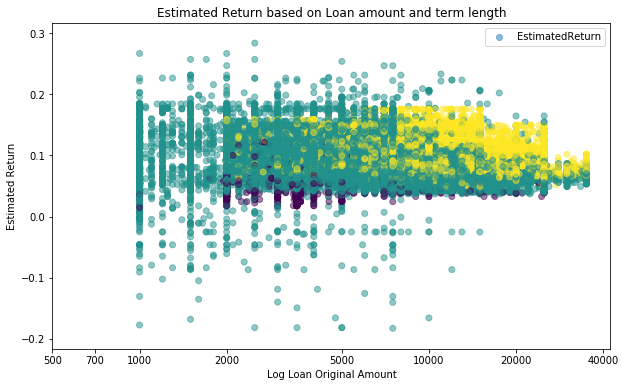

In [47]:
# Create a new column that has the log values of 'LoanOriginalAmount'
df2['log_loan_amount'] = df2['LoanOriginalAmount'].apply(log_trans)

# Create visualization
plt.figure(figsize = [10, 6])
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

plt.scatter(data = df2, x= 'log_loan_amount', y = 'EstimatedReturn', c = 'Term', alpha = 0.5);

plt.xticks(log_trans(np.array(ticks)), ticks)
plt.xlabel('Log Loan Original Amount')
plt.ylabel('Estimated Return')
plt.title('Estimated Return based on Loan amount and term length')
plt.legend()

## Borrower APR VS Credit Score and Term

Lower credit scores correlate with higher APR. As the loan amount increases, the APR lowers as well. It's also interesting to see that for the "Very Poor" credit score category there are not 60 month term loans. 

Insight 8: Longer term loans have on average lower APR. 

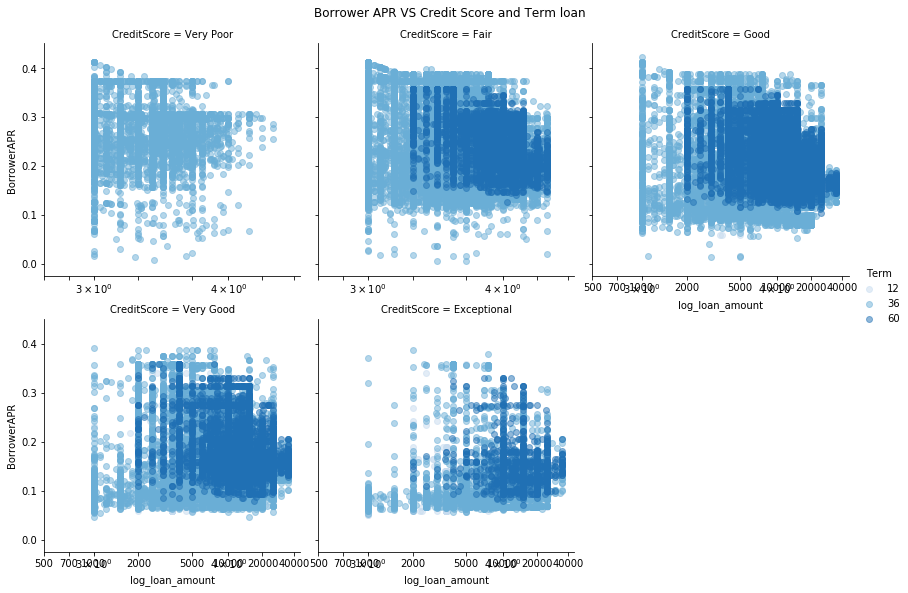

In [48]:
# plot the figure

g = sb.FacetGrid(data = df2, col = 'CreditScore', hue = 'Term', col_wrap = 3, height =4 , aspect = 1, palette = 'Blues')
g.map(plt.scatter, 'log_loan_amount','BorrowerAPR', alpha = 1/2)

g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]
g.set(xticks = log_trans(np.array(x_ticks)), xticklabels = x_ticks)
plt.suptitle('Borrower APR VS Credit Score and Term loan', y = 1.02)
g.add_legend()

## Borrower APR VS Listing Categories and Term
The lowest rates are for the 12 month term loan in home improvement, vacation and large purchases.

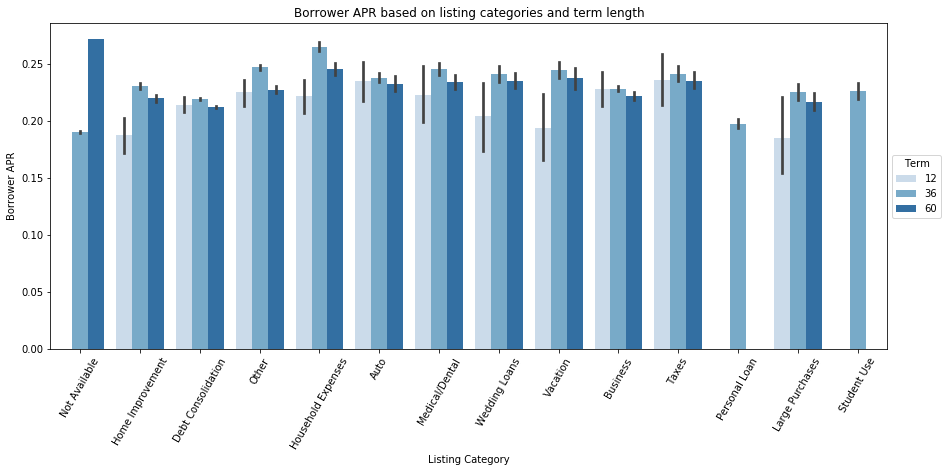

In [49]:
fig = plt.figure(figsize = [15,6])
ax = sb.barplot(data = df2_topcategories, x = 'ListingCategory', y = 'BorrowerAPR',  hue = 'Term', palette = 'Blues')
plt.title('Borrower APR based on listing categories and term length')
plt.xlabel('Listing Category')
plt.ylabel('Borrower APR')
plt.xticks(rotation = 60)
ax.legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))
plt.show();